In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pln_iefc_sims import *
from scipy.ndimage import rotate

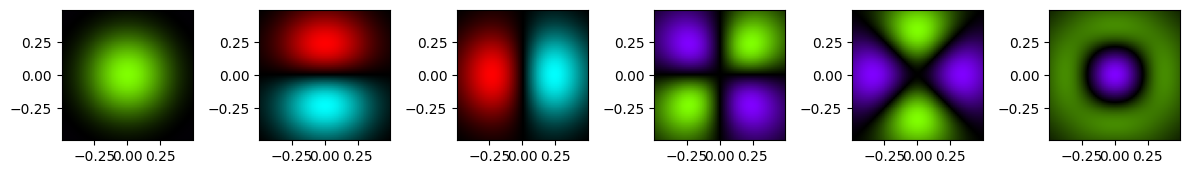

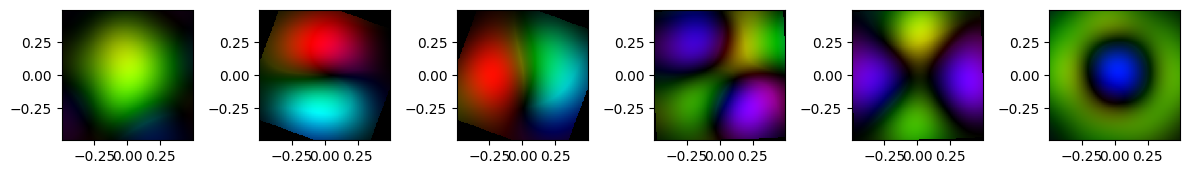

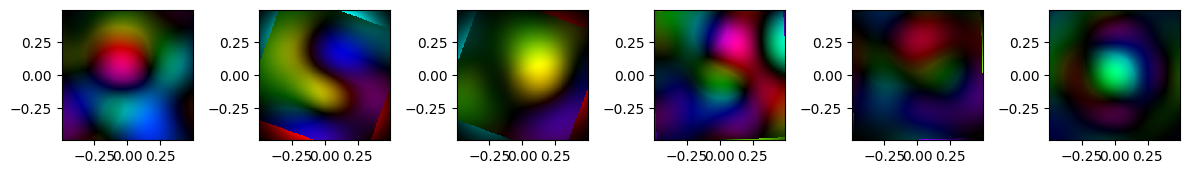

In [22]:
#backpropagate perfect and imperfect modes to pupil and take difference

pupils_perfect = []
for n in range(6):
    foc_wf = Wavefront(lp_modes[n])
    pupil = prop_lant2.backward(foc_wf)
    e_field = pupil.electric_field/np.sqrt(np.sum(np.square(np.abs(pupil.electric_field))))
    pupils_perfect.append(e_field)
    

pupils_real = []
for n in range(6):
    foc_wf = Wavefront(lant2_modes[n])
    pupil = prop_lant2.backward(foc_wf)
    e_field = pupil.electric_field/np.sqrt(np.sum(np.square(np.abs(pupil.electric_field))))
    pupils_real.append(e_field)

lp11_rotangle = 110
lp21_rotangle = 88

pupils_real[1] = Field(rotate(pupils_real[1].shaped,lp11_rotangle,reshape=False).ravel(),pupil.grid)
pupils_real[2] = Field(rotate(pupils_real[2].shaped,lp11_rotangle,reshape=False).ravel(),pupil.grid)
pupils_real[3] = Field(rotate(pupils_real[3].shaped,lp21_rotangle,reshape=False).ravel(),pupil.grid)
pupils_real[4] = Field(rotate(pupils_real[4].shaped,lp21_rotangle,reshape=False).ravel(),pupil.grid)

plt.figure(figsize=[12,20])
for n in range(6):
    plt.subplot(1,6,n+1)
    imshow_field(pupils_perfect[n])
plt.tight_layout()

plt.figure(figsize=[12,20])
for n in range(6):
    plt.subplot(1,6,n+1)
    imshow_field(pupils_real[n])
plt.tight_layout()

plt.figure(figsize=[12,20])
for n in range(6):
    plt.subplot(1,6,n+1)
    imshow_field(pupils_real[n]-pupils_perfect[n])
plt.tight_layout()